# Extracting Actionable Insights from FDA Text Data for Healthcare Decision-Making.

### Code by: 

Ujjwal Bhardwaj

Master of Data Science 

The Universiity of Adelaide 

### This project investigates the impact of the COVID-19 pandemic on dental implant safety by analyzing adverse event data from the FDA's Medical Device Reporting system using advanced machine learning techniques.t 

## Importing all necessary libraries

In [2]:
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob
from tabulate import tabulate

# Downloading necessary NLTK data for our analysis
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('stopwords')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ujjwa\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ujjwa\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\ujjwa\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ujjwa\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ujjwa\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## Loading the file

In [3]:
# Defining the file path
file_path = "C:\Project data Final\Project data Final\cleaned_foi_and_dev.csv"

# Loading the file into a pandas DataFrame
df = pd.read_csv(file_path, encoding='latin1', on_bad_lines='skip')

<>:2: SyntaxWarning: invalid escape sequence '\P'
<>:2: SyntaxWarning: invalid escape sequence '\P'
C:\Users\ujjwa\AppData\Local\Temp\ipykernel_13852\1861843378.py:2: SyntaxWarning: invalid escape sequence '\P'
  file_path = "C:\Project data Final\Project data Final\cleaned_foi_and_dev.csv"


## Getting basic Data Frame Information

In [4]:
df.describe

<bound method NDFrame.describe of        MDR_REPORT_KEY  DEVICE_EVENT_KEY  IMPLANT_FLAG  DATE_REMOVED_FLAG  \
0             7157250               NaN           NaN                NaN   
1             7157253               NaN           NaN                NaN   
2             7157256               NaN           NaN                NaN   
3             7157258               NaN           NaN                NaN   
4             7157259               NaN           NaN                NaN   
...               ...               ...           ...                ...   
58474        16079250               NaN           NaN                NaN   
58475        16079252               NaN           NaN                NaN   
58476        16079254               NaN           NaN                NaN   
58477        16079258               NaN           NaN                NaN   
58478        16079263               NaN           NaN                NaN   

       DEVICE_SEQUENCE_NO DATE_RECEIVED              

In [5]:

# Display basic information about the DataFrame
df_info = df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58479 entries, 0 to 58478
Data columns (total 30 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   MDR_REPORT_KEY                  58479 non-null  int64  
 1   DEVICE_EVENT_KEY                0 non-null      float64
 2   IMPLANT_FLAG                    0 non-null      float64
 3   DATE_REMOVED_FLAG               0 non-null      float64
 4   DEVICE_SEQUENCE_NO              58479 non-null  int64  
 5   DATE_RECEIVED                   58479 non-null  object 
 6   BRAND_NAME                      58478 non-null  object 
 7   GENERIC_NAME                    58479 non-null  object 
 8   MANUFACTURER_D_NAME             58479 non-null  object 
 9   MANUFACTURER_D_CITY             58474 non-null  object 
 10  DEVICE_OPERATOR                 58474 non-null  object 
 11  EXPIRATION_DATE_OF_DEVICE       23968 non-null  object 
 12  MODEL_NUMBER                    

In [6]:
# Displaying the first few rows of the DataFrame
df_head = df.head()
df_head

,MDR_REPORT_KEY,DEVICE_EVENT_KEY,IMPLANT_FLAG,DATE_REMOVED_FLAG,DEVICE_SEQUENCE_NO,DATE_RECEIVED,BRAND_NAME,GENERIC_NAME,MANUFACTURER_D_NAME,MANUFACTURER_D_CITY,...,DEVICE_EVALUATED_BY_MANUFACTUR,COMBINATION_PRODUCT_FLAG,UDI-DI,UDI-PUBLIC,MANUFACTURER_D_ADDRESS,MDR_TEXT_KEY,TEXT_TYPE_CODE,PATIENT_SEQUENCE_NUMBER,DATE_REPORT,FOI_TEXT
0,7157250,NaN,NaN,NaN,1,2018-01-02,CM DRIVE ACQUA IMPLANT 3.5X13,ENDOSSEOUS DENTAL IMPLANT,NEODENT - JJGC S.A.,CURITIBA,...,Y,N,07899878016847,07899878016847,"AV. JUSCELINO KUBITSCHEK DE OLIVEIRA, 3291 CIC...",96150685.0,N,1.0,NaN,"THE DENTIST REPORTED THAT, AROUND 2 WEEKS AFTE..."
1,7157253,NaN,NaN,NaN,1,2018-01-02,CM DRIVE IMPLANT 3.5X11.5,ENDOSSEOUS DENTAL IMPLANT,NEODENT - JJGC S.A.,CURITIBA,...,Y,N,07898237569314,07898237569314,"AV. JUSCELINO KUBITSCHEK DE OLIVEIRA, 3291 CIC...",96150933.0,N,1.0,NaN,"THE DENTIST REPORTED THAT, 2 MONTHS AFTER THE ..."
2,7157256,NaN,NaN,NaN,1,2018-01-02,TI TITAMAX IMPLANT (4.1)3.75X9,ENDOSSEOUS DENTAL IMPLANT,NEODENT - JJGC S.A.,CURITIBA,...,Y,N,07898237566894,07898237566894,"AV. JUSCELINO KUBITSCHEK DE OLIVEIRA, 3291 CIC...",96151011.0,N,1.0,NaN,"THE DENTIST REPORTED THAT, 2 MONTHS AFTER THE ..."
3,7157258,NaN,NaN,NaN,1,2018-01-02,TI DRIVE ACQUA IMPLANT (4.3) 4.3X10,ENDOSSEOUS DENTAL IMPLANT,NEODENT - JJGC S.A.,CURITIBA,...,Y,N,07899878017134,07899878017134,"AV. JUSCELINO KUBITSCHEK DE OLIVEIRA, 3291 CIC...",96151225.0,N,1.0,NaN,"THE DENTIST REPORTED THAT, 1 MONTH AFTER THE D..."
4,7157259,NaN,NaN,NaN,1,2018-01-02,CM DRIVE IMPLANT 3.5X8,ENDOSSEOUS DENTAL IMPLANT,NEODENT - JJGC S.A.,CURITIBA,...,Y,N,07898237569307,07898237569307,"AV. JUSCELINO KUBITSCHEK DE OLIVEIRA, 3291 CIC...",96151202.0,N,1.0,NaN,"THE DENTIST REPORTED THAT, 5 MONTHS AFTER THE ..."


In [7]:
# Generating a Summary statistics of the DataFrame
df_describe = df.describe(include='all')
df_describe

,MDR_REPORT_KEY,DEVICE_EVENT_KEY,IMPLANT_FLAG,DATE_REMOVED_FLAG,DEVICE_SEQUENCE_NO,DATE_RECEIVED,BRAND_NAME,GENERIC_NAME,MANUFACTURER_D_NAME,MANUFACTURER_D_CITY,...,DEVICE_EVALUATED_BY_MANUFACTUR,COMBINATION_PRODUCT_FLAG,UDI-DI,UDI-PUBLIC,MANUFACTURER_D_ADDRESS,MDR_TEXT_KEY,TEXT_TYPE_CODE,PATIENT_SEQUENCE_NUMBER,DATE_REPORT,FOI_TEXT
count,5.847900e+04,0.0,0.0,0.0,58479.0,58479,58478,58479,58479,58474,...,53387,58479,55236,55240,58479,5.738200e+04,57382,57382.000000,0.0,57382
unique,NaN,NaN,NaN,NaN,NaN,1085,1231,16,33,28,...,4,2,453,597,48,NaN,2,NaN,NaN,45123
top,NaN,NaN,NaN,NaN,NaN,2022-08-02,"GM HELIX IMPLANT,TI,3.5X10",ENDOSSEOUS DENTAL IMPLANT,JJGC S.A.,CURITIBA,...,Y,N,07899878024156,07899878024156,"AV. JUSCELINO KUBITSCHEK DE OLIVEIRA, 3291 CIC...",NaN,N,NaN,NaN,THE BATCH NUMBER COULD BE VERIFIED. OUR MANUFA...
freq,NaN,NaN,NaN,NaN,NaN,618,1326,56682,40542,55933,...,50015,58478,1416,1406,55933,NaN,40131,NaN,NaN,495
mean,1.215773e+07,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,2.377764e+08,NaN,0.538200,NaN,NaN
std,2.752422e+06,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,6.692877e+07,NaN,0.498543,NaN,NaN
min,7.157250e+06,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,9.615068e+07,NaN,0.000000,NaN,NaN
25%,9.666680e+06,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1.771563e+08,NaN,0.000000,NaN,NaN
50%,1.236202e+07,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,2.683441e+08,NaN,1.000000,NaN,NaN
75%,1.487774e+07,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,2.950570e+08,NaN,1.000000,NaN,NaN


## Visualization of data by year

C:\Users\ujjwa\AppData\Local\Temp\ipykernel_13852\2209717798.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=yearly_counts.index, y=yearly_counts.values, palette="viridis")


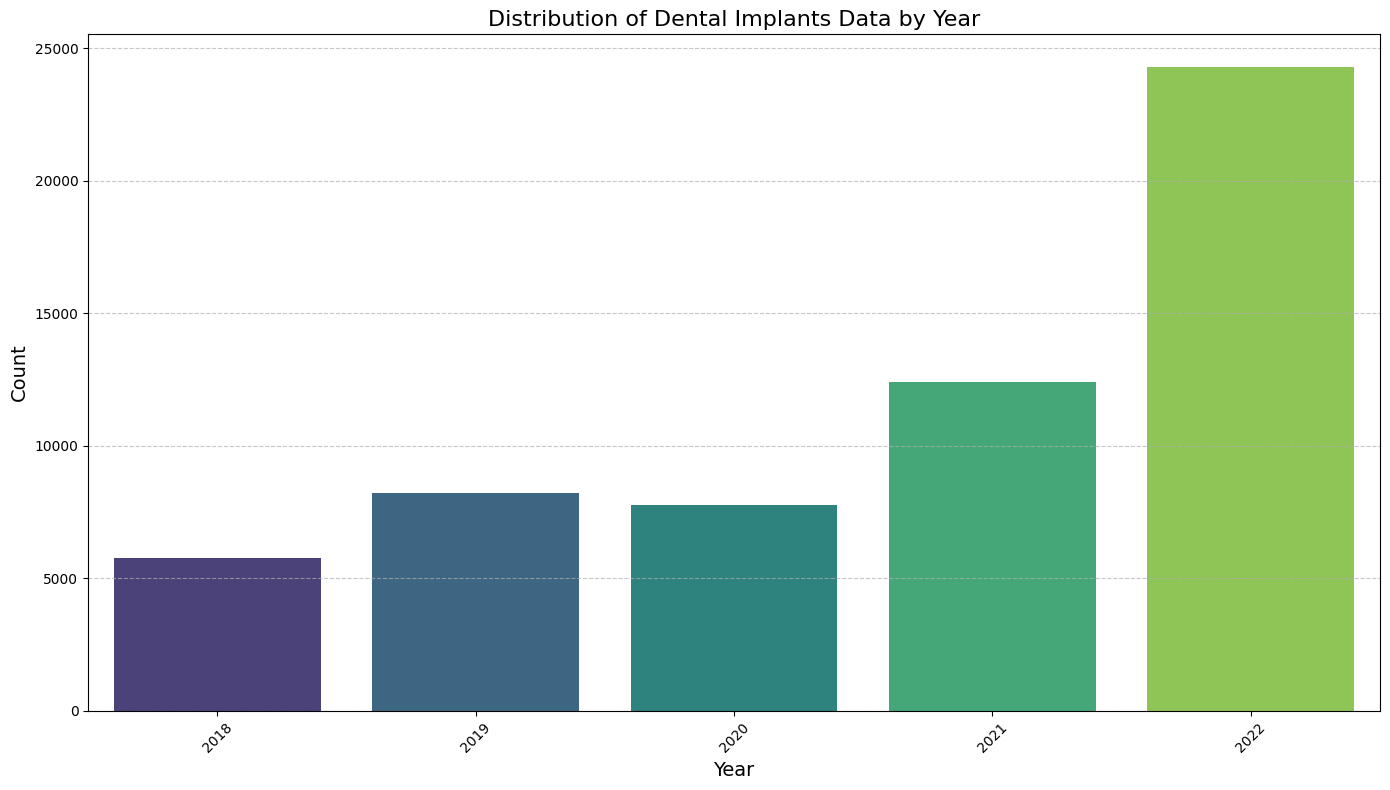

In [8]:
df['DATE_RECEIVED'] = pd.to_datetime(df['DATE_RECEIVED'], errors='coerce')

# Extract the year from the DATE_RECEIVED column
df['YEAR'] = df['DATE_RECEIVED'].dt.year

# Group the data by year and count the occurrences
yearly_counts = df['YEAR'].value_counts().sort_index()

plt.figure(figsize=(14, 8))
sns.barplot(x=yearly_counts.index, y=yearly_counts.values, palette="viridis")

plt.title('Distribution of Dental Implants Data by Year', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Show the plot
plt.show()

## Performing Lemmatization

In [9]:
# Initializing the lemmatizer
lemmatizer = WordNetLemmatizer()

# Defining a function to lemmatize text
def lemmatize_text(text):
    words = nltk.word_tokenize(text)
    lemmatized_words = [lemmatizer.lemmatize(word) for word in words]
    return ' '.join(lemmatized_words)

In [10]:
df['FOI_TEXT'] = df['FOI_TEXT'].astype(str)
df['FOI_TEXT'] = df['FOI_TEXT'].apply(lemmatize_text)

In [11]:
df.head()

,MDR_REPORT_KEY,DEVICE_EVENT_KEY,IMPLANT_FLAG,DATE_REMOVED_FLAG,DEVICE_SEQUENCE_NO,DATE_RECEIVED,BRAND_NAME,GENERIC_NAME,MANUFACTURER_D_NAME,MANUFACTURER_D_CITY,...,COMBINATION_PRODUCT_FLAG,UDI-DI,UDI-PUBLIC,MANUFACTURER_D_ADDRESS,MDR_TEXT_KEY,TEXT_TYPE_CODE,PATIENT_SEQUENCE_NUMBER,DATE_REPORT,FOI_TEXT,YEAR
0,7157250,NaN,NaN,NaN,1,2018-01-02,CM DRIVE ACQUA IMPLANT 3.5X13,ENDOSSEOUS DENTAL IMPLANT,NEODENT - JJGC S.A.,CURITIBA,...,N,07899878016847,07899878016847,"AV. JUSCELINO KUBITSCHEK DE OLIVEIRA, 3291 CIC...",96150685.0,N,1.0,NaN,"THE DENTIST REPORTED THAT , AROUND 2 WEEKS AFT...",2018
1,7157253,NaN,NaN,NaN,1,2018-01-02,CM DRIVE IMPLANT 3.5X11.5,ENDOSSEOUS DENTAL IMPLANT,NEODENT - JJGC S.A.,CURITIBA,...,N,07898237569314,07898237569314,"AV. JUSCELINO KUBITSCHEK DE OLIVEIRA, 3291 CIC...",96150933.0,N,1.0,NaN,"THE DENTIST REPORTED THAT , 2 MONTHS AFTER THE...",2018
2,7157256,NaN,NaN,NaN,1,2018-01-02,TI TITAMAX IMPLANT (4.1)3.75X9,ENDOSSEOUS DENTAL IMPLANT,NEODENT - JJGC S.A.,CURITIBA,...,N,07898237566894,07898237566894,"AV. JUSCELINO KUBITSCHEK DE OLIVEIRA, 3291 CIC...",96151011.0,N,1.0,NaN,"THE DENTIST REPORTED THAT , 2 MONTHS AFTER THE...",2018
3,7157258,NaN,NaN,NaN,1,2018-01-02,TI DRIVE ACQUA IMPLANT (4.3) 4.3X10,ENDOSSEOUS DENTAL IMPLANT,NEODENT - JJGC S.A.,CURITIBA,...,N,07899878017134,07899878017134,"AV. JUSCELINO KUBITSCHEK DE OLIVEIRA, 3291 CIC...",96151225.0,N,1.0,NaN,"THE DENTIST REPORTED THAT , 1 MONTH AFTER THE ...",2018
4,7157259,NaN,NaN,NaN,1,2018-01-02,CM DRIVE IMPLANT 3.5X8,ENDOSSEOUS DENTAL IMPLANT,NEODENT - JJGC S.A.,CURITIBA,...,N,07898237569307,07898237569307,"AV. JUSCELINO KUBITSCHEK DE OLIVEIRA, 3291 CIC...",96151202.0,N,1.0,NaN,"THE DENTIST REPORTED THAT , 5 MONTHS AFTER THE...",2018


## Finding out the top 300 words for our data (through FOI_TEXT column)

In [35]:
# Defiinge the stop words
stop_words = set(stopwords.words('english'))

# Adding any additional stop words
custom_stop_words = set([
    'implant', 'implants', 'dental', 'patient', 'reported', 'reports', 
    'et', 'al', 'b', 'manufacturer', 'device', 'production', 'process', 
    'manufacturing', 'distributed', 'may', 'could', 'known', 'applicable', 
    'trend', 'assures', 'controls', 'confirms', 'ensure', 'confirm', 
    'one', 'around', 'according', 'case', 'literature', 'associated', 'forwarded', 'clinician', 'installed', 'criteria', 'absence', 'dentist', 
    'met', 'expected', 'scientific', 'based', 'pain', 'failure', 'infection', 'success', 'complications', 'treatment', 'mobility', 'bone', 'analysis', 'inserted', 'risk', 'removed', 'complaints', 'recurrent', 'continuous', 'sensation', 'radiolucency', 'persistent', 'dysesthesia', 'suppuration'])
stop_words = stop_words.union(custom_stop_words)

In [13]:
# Concatenating all the text in FOI_TEXT column
all_text = ' '.join(df['FOI_TEXT'].astype(str).tolist())

# Tokenizing the text
words = word_tokenize(all_text.lower())

# Filtering out the stopwords and non-alphabetic tokens
filtered_words = [word for word in words if word.isalpha() and word not in stop_words]

# Get the most common words
top_words = Counter(filtered_words).most_common(300)

top_words

[('absence', 144710),
 ('verified', 83758),
 ('rate', 72793),
 ('criteria', 72511),
 ('clinician', 61457),
 ('forwarded', 52165),
 ('number', 46403),
 ('published', 41446),
 ('batch', 40234),
 ('place', 40166),
 ('specifications', 40142),
 ('batches', 39965),
 ('inherent', 39767),
 ('endosseous', 36543),
 ('buser', 36181),
 ('subjective', 36180),
 ('body', 36072),
 ('foreign', 36057),
 ('dentist', 32334),
 ('early', 31484),
 ('year', 31164),
 ('occlusal', 31113),
 ('event', 31008),
 ('failures', 30840),
 ('loading', 30821),
 ('healing', 30803),
 ('implantation', 30705),
 ('fail', 30693),
 ('clinical', 30669),
 ('first', 30659),
 ('analainen', 30657),
 ('occur', 30654),
 ('studies', 30654),
 ('ganeles', 30650),
 ('within', 30599),
 ('phase', 30546),
 ('presented', 28362),
 ('information', 26263),
 ('product', 25499),
 ('osseointegration', 25393),
 ('type', 24580),
 ('injuries', 23019),
 ('mouth', 22649),
 ('experienced', 21827),
 ('ada', 21812),
 ('due', 21312),
 ('surgery', 19398),
 ('

## Generating wordclouds

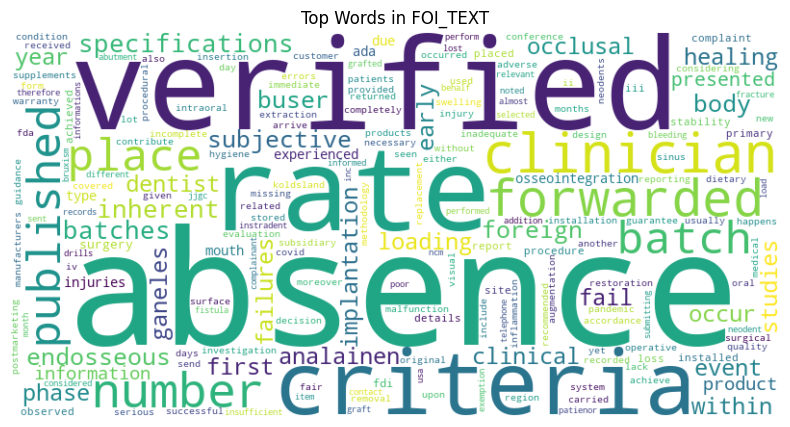

In [14]:
top_words_dict = dict(top_words)

# Generating the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(top_words_dict)

# Plotting the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Top Words in FOI_TEXT')
plt.show()

In [15]:
print(tabulate(top_words, headers=['Word', 'Frequency'], tablefmt='grid'))

+------------------+-------------+
| Word             |   Frequency |
+==================+=============+
| absence          |      144710 |
+------------------+-------------+
| verified         |       83758 |
+------------------+-------------+
| rate             |       72793 |
+------------------+-------------+
| criteria         |       72511 |
+------------------+-------------+
| clinician        |       61457 |
+------------------+-------------+
| forwarded        |       52165 |
+------------------+-------------+
| number           |       46403 |
+------------------+-------------+
| published        |       41446 |
+------------------+-------------+
| batch            |       40234 |
+------------------+-------------+
| place            |       40166 |
+------------------+-------------+
| specifications   |       40142 |
+------------------+-------------+
| batches          |       39965 |
+------------------+-------------+
| inherent         |       39767 |
+------------------+

## Conducting a basic sentiment analysis of our lemmatized data, using the Textblob library

In [18]:
# Adding TextBlob sentiment analysis
df['polarity'] = df['FOI_TEXT'].apply(lambda x: TextBlob(x).sentiment.polarity)

# Separating the positive and negative words based on polarity
positive_text = ' '.join(df[df['polarity'] > 0]['FOI_TEXT'])
negative_text = ' '.join(df[df['polarity'] < 0]['FOI_TEXT'])

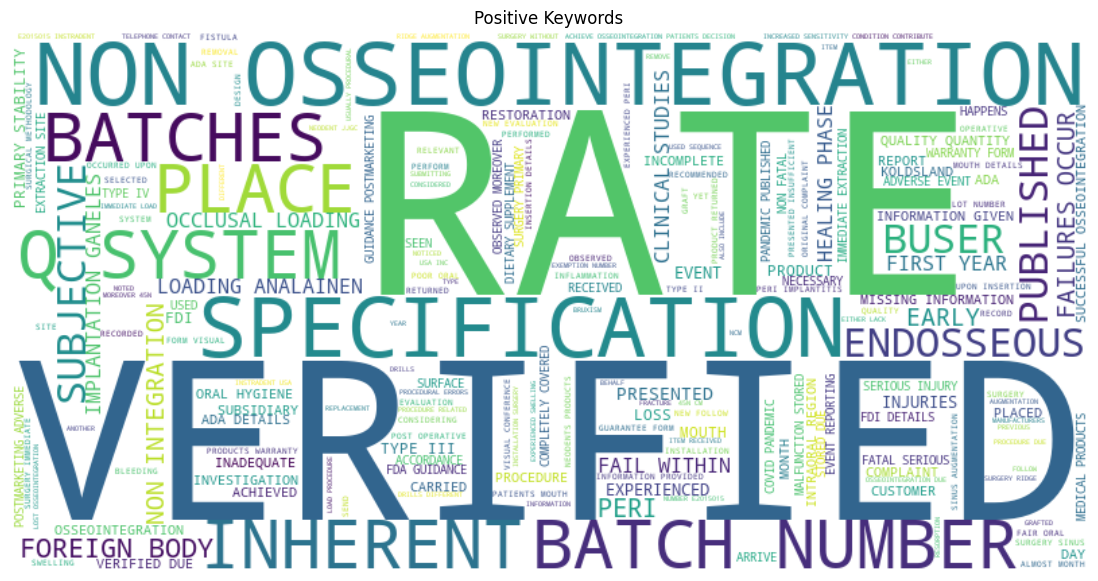

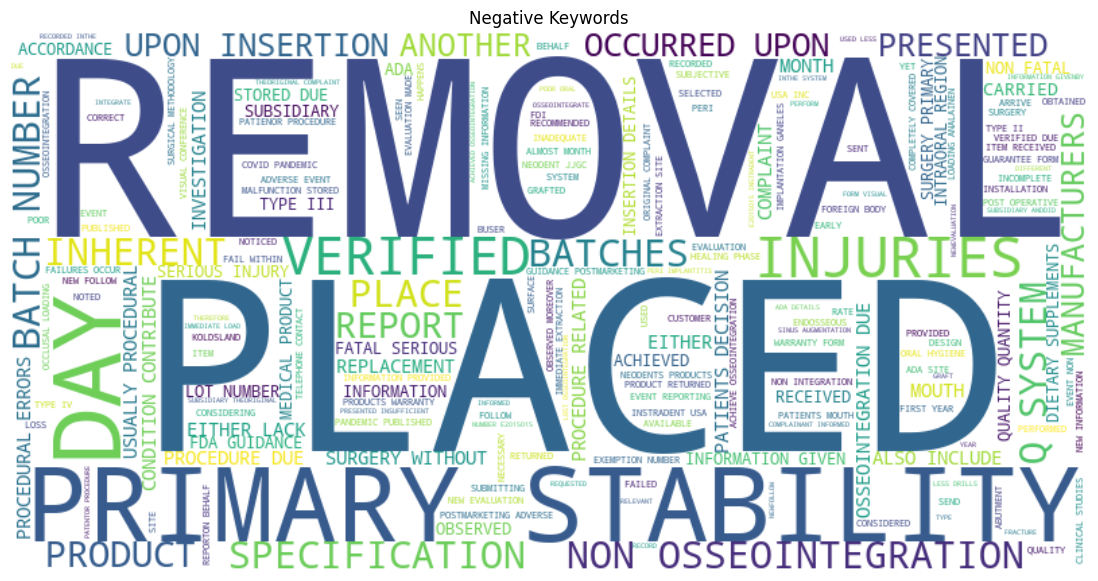

In [37]:
# Generating our word clouds
positive_wordcloud = WordCloud(stopwords=stop_words, width=800, height=400, background_color='white').generate(positive_text)
negative_wordcloud = WordCloud(stopwords=stop_words, width=800, height=400, background_color='white').generate(negative_text)

plt.figure(figsize=(15, 7))
plt.imshow(positive_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Positive Keywords')
plt.show()

plt.figure(figsize=(15, 7))
plt.imshow(negative_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Negative Keywords')
plt.show()


## Initialization of developed keyword mapping table

In [20]:
adverse_events_keywords = {
    'Pain': ['injuries', 'injury', 'causes', 'bruxism', 'break', 'disease', 'pain'],
    'Failure': ['failures', 'loss', 'fail', 'incomplete', 'errors', 'failed', 'failure'],
    'Success': ['stability', 'healing', 'achieved', 'successful', 'verified'],
    'Complications': ['immediate', 'problem', 'complication', 'malfunction', 'serious', 'covid', 'lack', 'flaws', 'complications'],
    'Treatment': ['surgery', 'procedure', 'intraoral', 'provided', 'received', 'restoration', 'surgical'],
    'Swelling': ['swelling', 'inflammation', 'sinus', 'fracture', 'overheating', 'damage', 'infection'],
    'Stress': ['trauma', 'condition', 'risk', 'recurrent'],
    'Analysis Events': ['report', 'observed', 'investigation', 'evaluation'],
    'Implant Operations': ['implantation', 'installed', 'placed', 'insertion', 'replacement', 'performed', 'instradent'],
    'Bleeding': ['bleeding', 'resorption', 'tissue'],
    'Implant Removal': ['removal', 'remove', 'removed', 'missing'],
    'Complaints': ['complaint', 'inadequate', 'complainant'],
    'Sensation': ['experienced', 'sensitivity', 'torqued', 'hypersensitivity', 'experience', 'dysesthesia']
}


table_data = [(event, ', '.join(keywords)) for event, keywords in adverse_events_keywords.items()]
print(tabulate(table_data, headers=['Adverse Event', 'Keywords'], tablefmt='grid'))

+--------------------+-------------------------------------------------------------------------------------------+
| Adverse Event      | Keywords                                                                                  |
+====================+===========================================================================================+
| Pain               | injuries, injury, causes, bruxism, break, disease, pain                                   |
+--------------------+-------------------------------------------------------------------------------------------+
| Failure            | failures, loss, fail, incomplete, errors, failed, failure                                 |
+--------------------+-------------------------------------------------------------------------------------------+
| Success            | stability, healing, achieved, successful, verified                                        |
+--------------------+----------------------------------------------------------

## Event Classification

In [21]:
# Creating a function to help classify our events
def classify_event(text):
    words = word_tokenize(text.lower())
    event_counts = {event: 0 for event in adverse_events_keywords}
    for word in words:
        for event, keywords in adverse_events_keywords.items():
            if word in keywords:
                event_counts[event] += 1
    max_event = max(event_counts, key=event_counts.get)
    return max_event if event_counts[max_event] > 0 else 'Other'

In [22]:
df['EVENT'] = df['FOI_TEXT'].astype(str).apply(classify_event)

# Counting the number of occurrences for each event
event_counts = df['EVENT'].value_counts()

# Calculating the percentage for each event type
total_count = event_counts.sum()
event_percentages = (event_counts / total_count) * 100

# Creating a DataFrame with counts and percentages
event_summary = pd.DataFrame({
    'Event Type': event_counts.index,
    'Count of Adverse Events': event_counts.values,
    'Percentage': event_percentages.values
})

print(event_summary)

            Event Type  Count of Adverse Events  Percentage
0              Failure                    30628   52.374357
1              Success                     7031   12.023119
2      Analysis Events                     6750   11.542605
3            Treatment                     4132    7.065784
4                 Pain                     3193    5.460080
5        Complications                     2680    4.582842
6   Implant Operations                     1504    2.571863
7                Other                     1407    2.405992
8             Swelling                      773    1.321842
9            Sensation                      214    0.365943
10     Implant Removal                      104    0.177842
11          Complaints                       44    0.075241
12            Bleeding                       15    0.025650
13              Stress                        4    0.006840


C:\Users\ujjwa\AppData\Local\Temp\ipykernel_13852\4216938193.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=event_summary['Count of Adverse Events'], y=event_summary['Event Type'], palette='viridis')


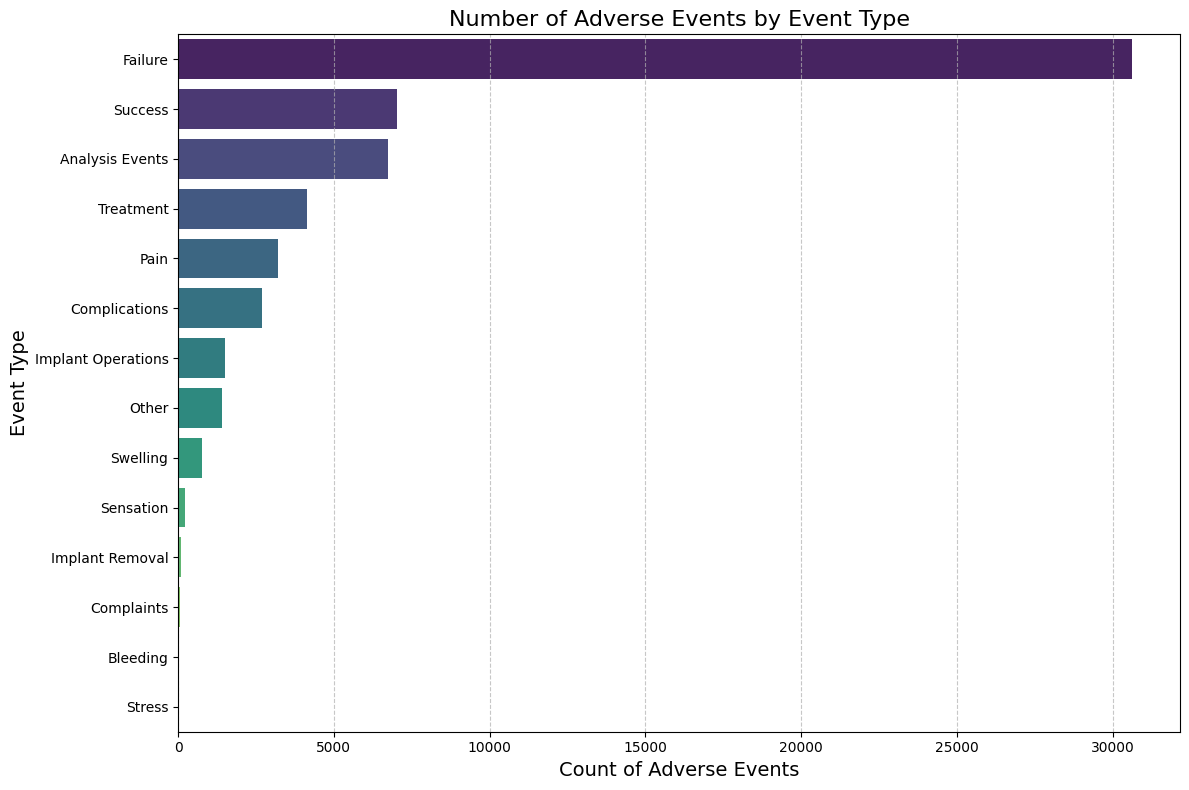

In [23]:
# Plotting a horizontal bar chart of events vs the number of events
plt.figure(figsize=(12, 8))
sns.barplot(x=event_summary['Count of Adverse Events'], y=event_summary['Event Type'], palette='viridis')
plt.title('Number of Adverse Events by Event Type', fontsize=16)
plt.xlabel('Count of Adverse Events', fontsize=14)
plt.ylabel('Event Type', fontsize=14)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## Visualizations

In [24]:
# Converting the DATE_RECEIVED column to datetime format
df['DATE_RECEIVED'] = pd.to_datetime(df['DATE_RECEIVED'], errors='coerce')

# Extract the year from the DATE_RECEIVED column
df['YEAR_RECEIVED'] = df['DATE_RECEIVED'].dt.year

<Figure size 1500x1000 with 0 Axes>

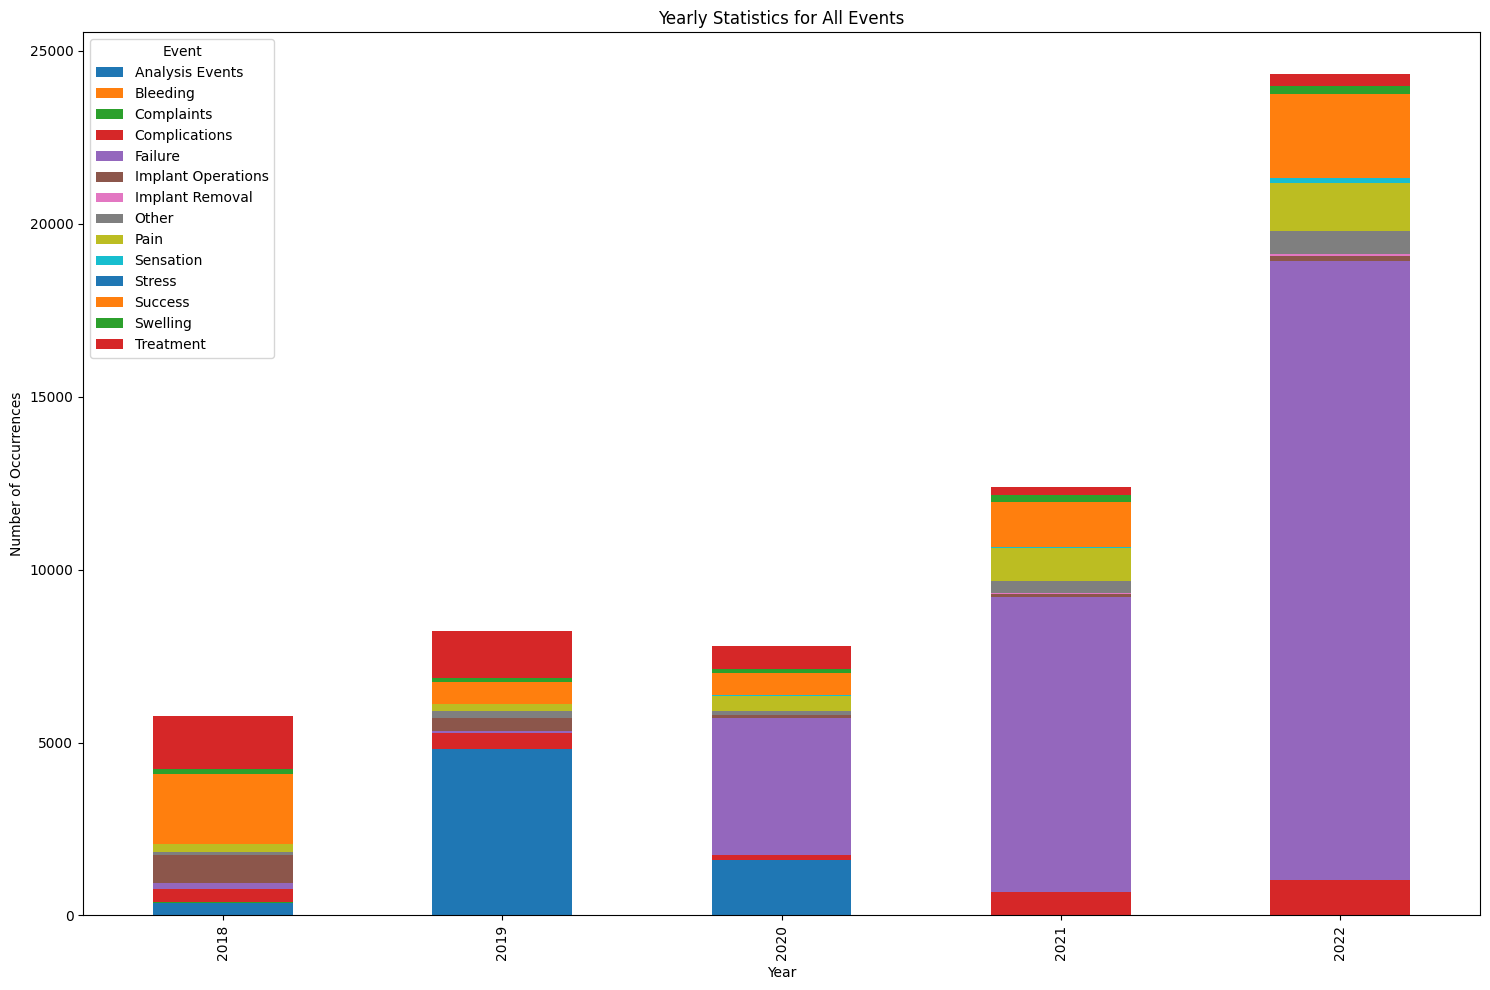

In [25]:
# Grouping the data by year and event, then count the occurrences
yearly_stats = df.groupby(['YEAR_RECEIVED', 'EVENT']).size().unstack().fillna(0)

# Plot yearly statistics for all events
plt.figure(figsize=(15, 10))
yearly_stats.plot(kind='bar', stacked=True, figsize=(15, 10))
plt.title('Yearly Statistics for All Events')
plt.xlabel('Year')
plt.ylabel('Number of Occurrences')
plt.legend(title='Event')
plt.tight_layout()
plt.show()

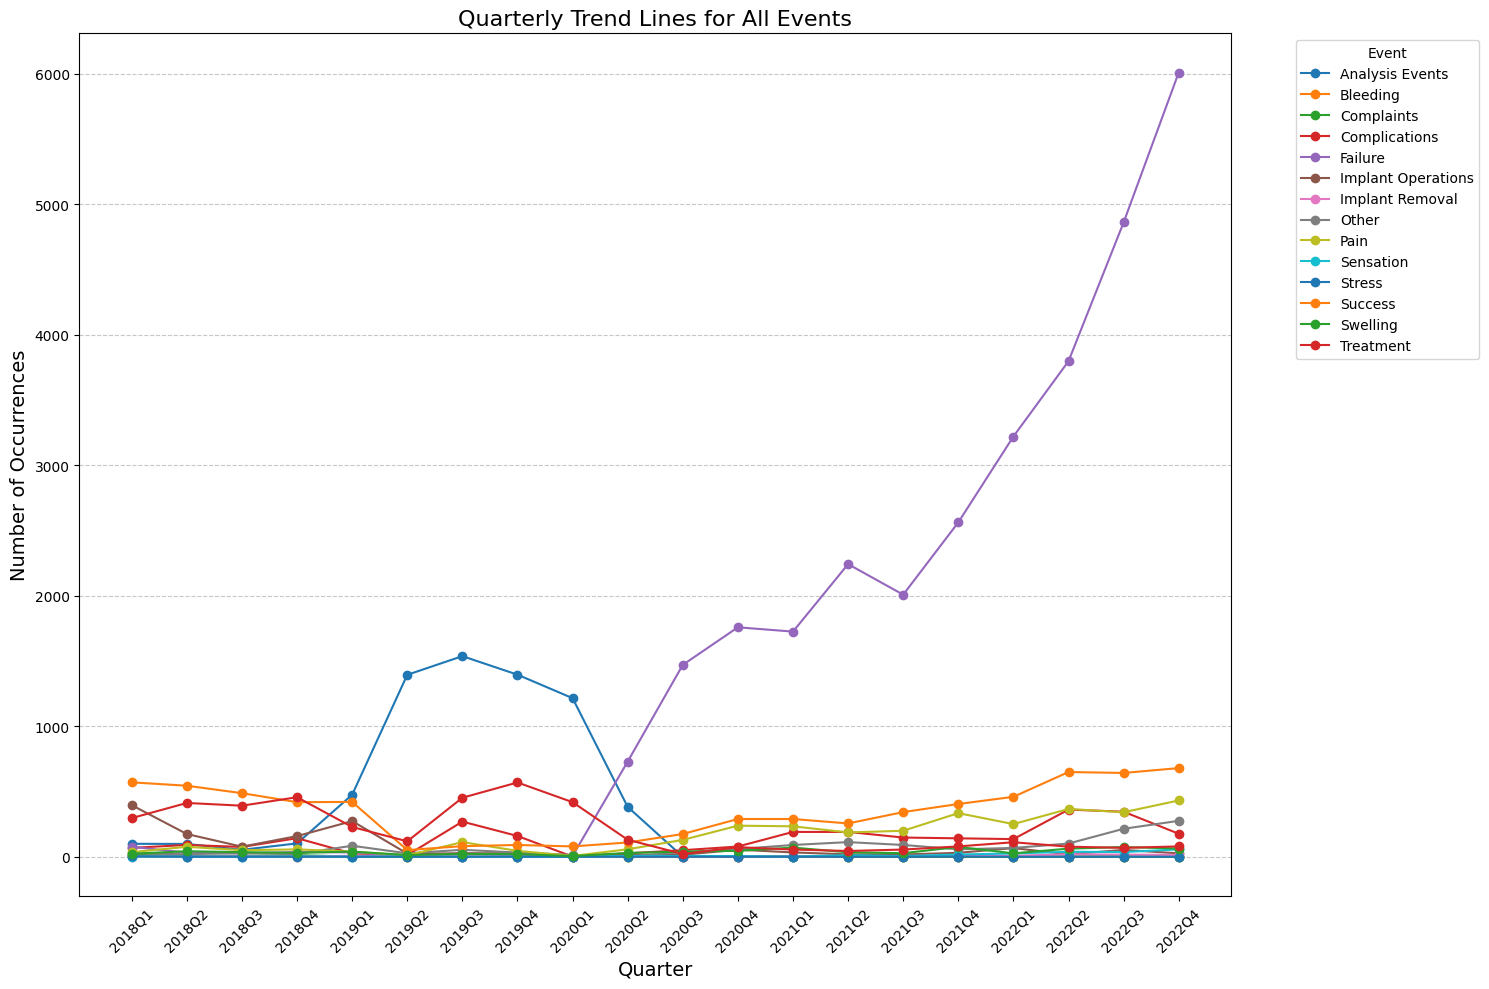

In [26]:
# Extracting the year and quarter from the DATE_RECEIVED column
df['YEAR_QUARTER'] = df['DATE_RECEIVED'].dt.to_period('Q')

# Grouping the data by quarter and event, then count the occurrences
quarterly_stats = df.groupby(['YEAR_QUARTER', 'EVENT']).size().unstack().fillna(0)

# Converting the YEAR_QUARTER to string for plotting
quarterly_stats.index = quarterly_stats.index.astype(str)

# Plotting quarterly statistics for all events with trend lines and highlighted points
plt.figure(figsize=(15, 10))

for event in quarterly_stats.columns:
    plt.plot(quarterly_stats.index, quarterly_stats[event], marker='o', label=event)

plt.title('Quarterly Trend Lines for All Events', fontsize=16)
plt.xlabel('Quarter', fontsize=14)
plt.ylabel('Number of Occurrences', fontsize=14)
plt.legend(title='Event', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

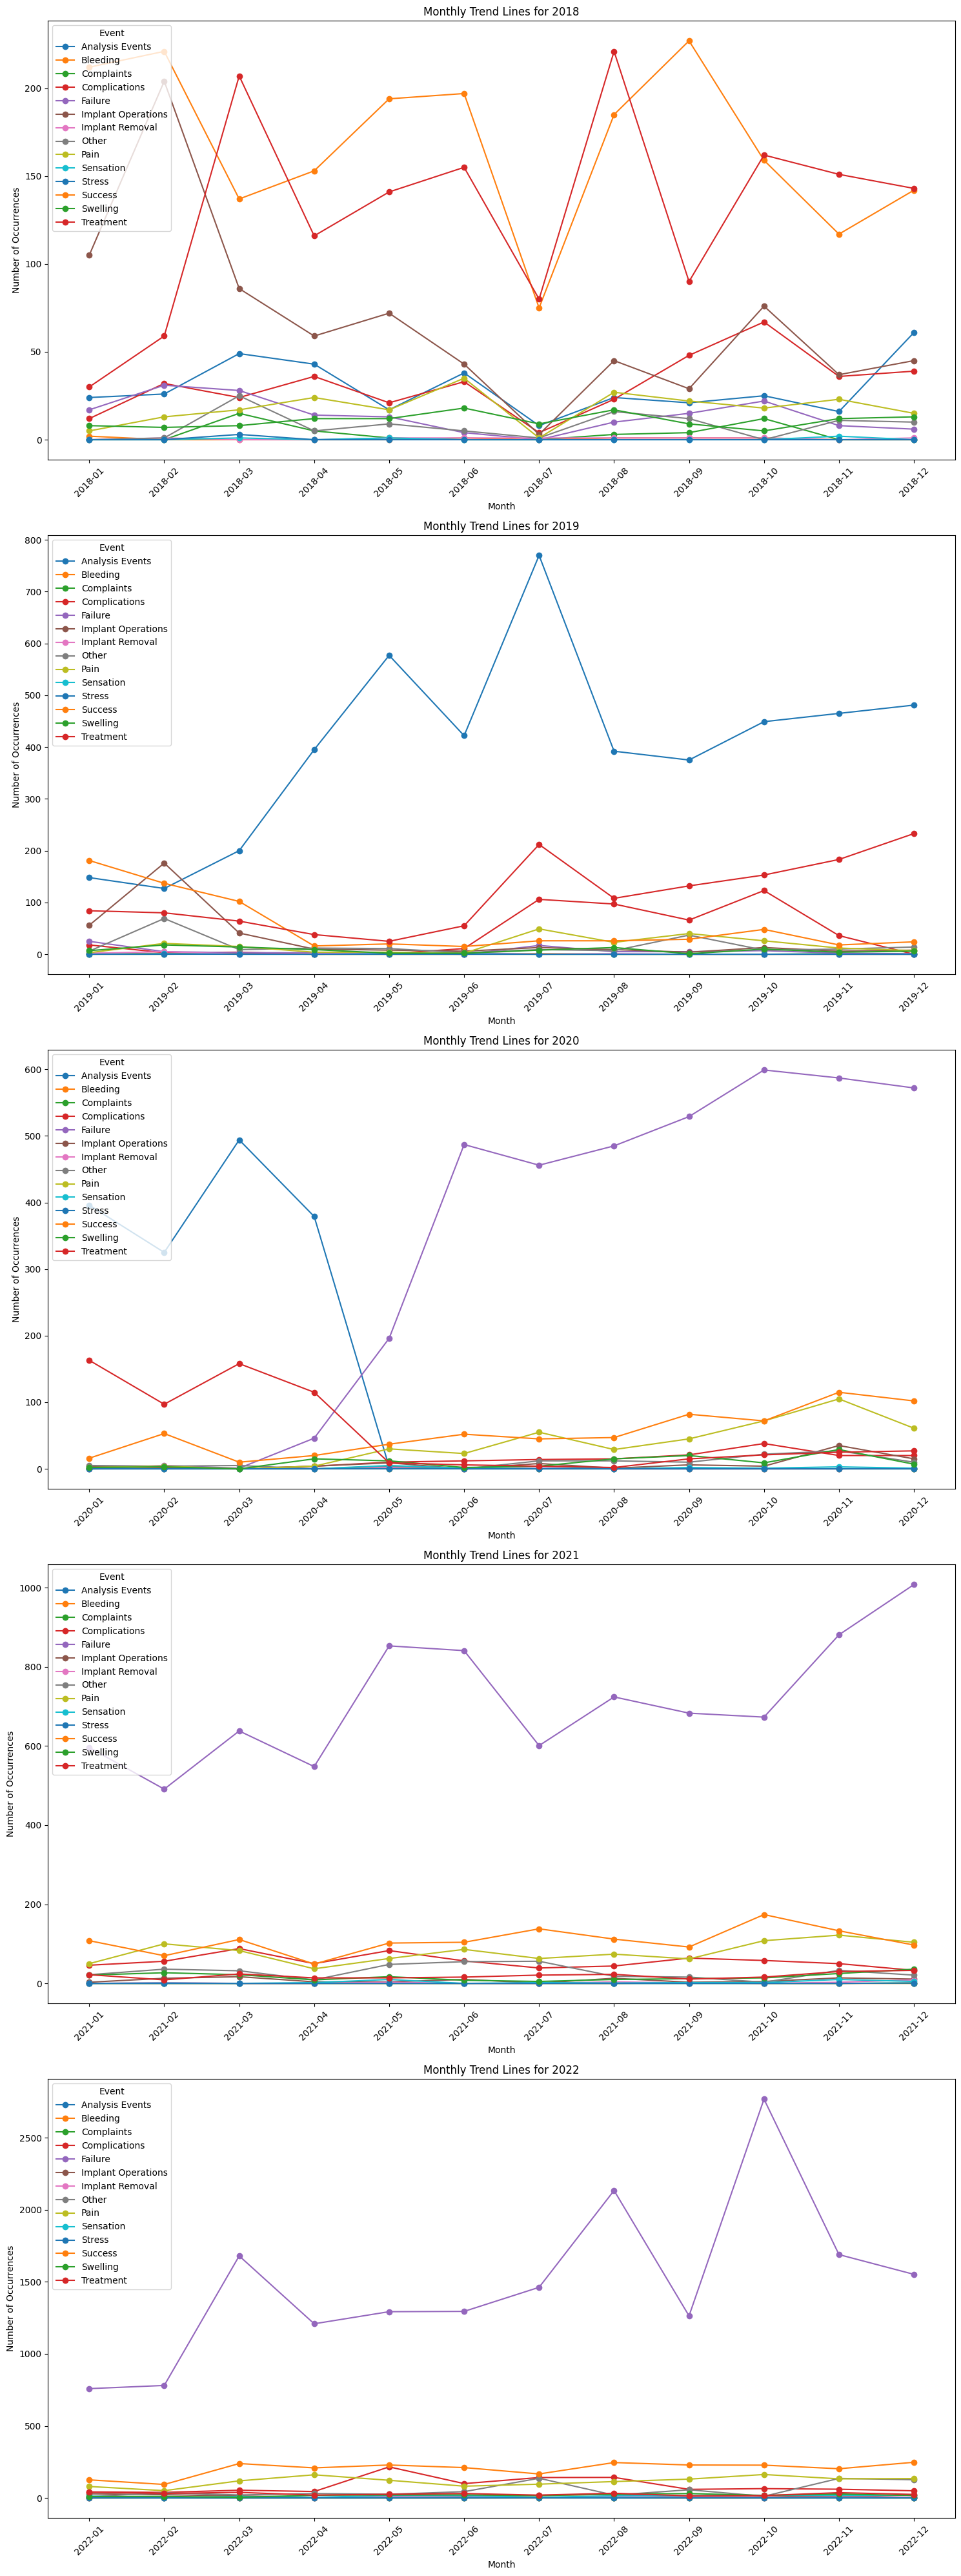

In [27]:
# Extracting the year and month from the DATE_RECEIVED column
df['YEAR'] = df['DATE_RECEIVED'].dt.year
df['MONTH'] = df['DATE_RECEIVED'].dt.month
df['YEAR_MONTH'] = df['DATE_RECEIVED'].dt.to_period('M')

# Grouping the data by year, month, and event, then count the occurrences
monthly_stats = df.groupby(['YEAR_MONTH', 'EVENT']).size().unstack().fillna(0)

# Extracting unique years for plotting
years = df['YEAR'].dropna().unique()

# Plotting monthly statistics for all events with trend lines and highlighted points for each year
fig, axes = plt.subplots(len(years), 1, figsize=(15, 8 * len(years)), sharex=False)

for ax, year in zip(axes, sorted(years)):
    yearly_data = monthly_stats.loc[str(year)]
    monthly_index = [f'{year}-{month:02d}' for month in range(1, 13)]
    yearly_data = yearly_data.reindex(monthly_index).fillna(0)
    for event in yearly_data.columns:
        ax.plot(yearly_data.index.astype(str), yearly_data[event], marker='o', label=event)
    ax.set_title(f'Monthly Trend Lines for {year}')
    ax.set_xlabel('Month')
    ax.set_ylabel('Number of Occurrences')
    ax.legend(title='Event', loc='upper left')
    ax.tick_params(axis='x', rotation=45)
    ax.set_xticks(monthly_index)
    ax.set_xticklabels([f'{year}-{month:02d}' for month in range(1, 13)], rotation=45)

plt.tight_layout()
plt.show()

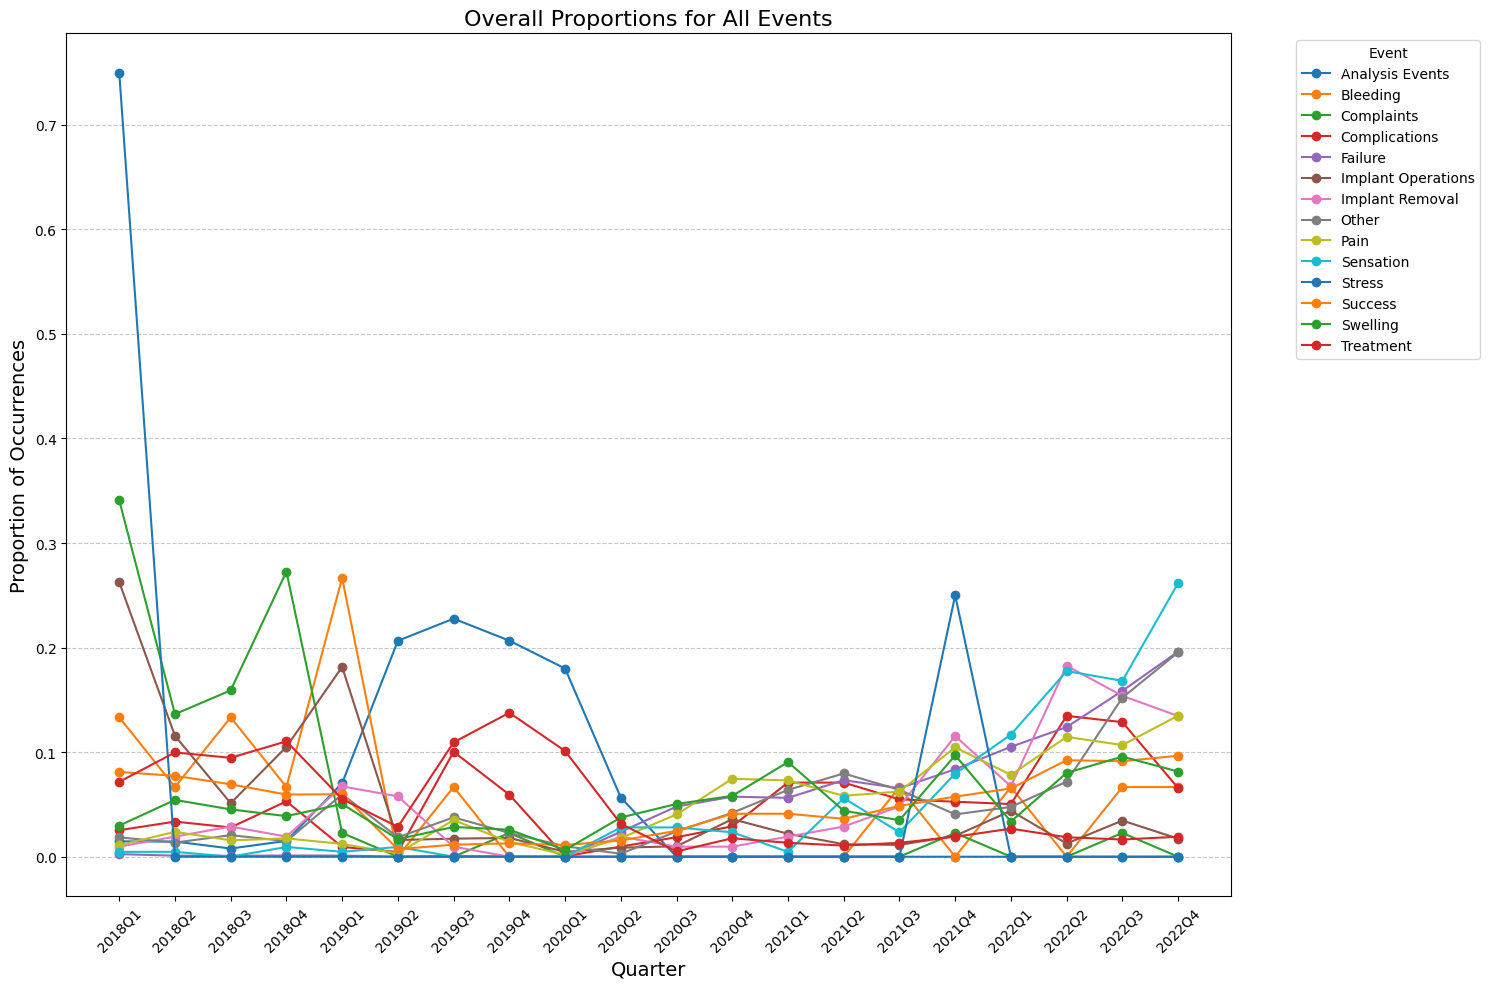

In [28]:
# Grouping the data by quarter and event, then counting all the occurrences
quarterly_stats = df.groupby(['YEAR_QUARTER', 'EVENT']).size().unstack().fillna(0)

# Converting all counts to proportions for the entire dataset
total_counts = quarterly_stats.sum(axis=0)
overall_proportions = quarterly_stats.div(total_counts, axis=1)

# Convert the YEAR_QUARTER to string for plotting
overall_proportions.index = overall_proportions.index.astype(str)

# Plotting overall proportions for all events with trend lines and highlighted points
plt.figure(figsize=(15, 10))

for event in overall_proportions.columns:
    plt.plot(overall_proportions.index, overall_proportions[event], marker='o', label=event)

plt.title('Overall Proportions for All Events', fontsize=16)
plt.xlabel('Quarter', fontsize=14)
plt.ylabel('Proportion of Occurrences', fontsize=14)
plt.legend(title='Event', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()